<h1 align=center>Assignment 2</h1>

<h2 align=center>Hierachical Clustering</h2>
    
---

**Group**: 9 (Gagandeep Singh | Simranpreet Singh | Suraj)
### Data:
Obtained from Credit Card Dataset for Clustering | Kaggle, original source unknown.

### Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

In [37]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

<h2 align=center>Data</h2>

---

In [2]:
# loading dataset to Pandas DataFrame
df = pd.read_csv("CC GENERAL.csv")

df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000


### Data Overview:
Teh dataset contains various columns that explains credit card usage and behaviour for different customers. Below is an explanation of each column and observations based on the summary statistics. 

#### Columns:
* **CUST_ID**: Identification of the card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases.
* **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES**: Amount of purchases made from account
* **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
* **CASH_ADVANCE**: Cash in advance given by the user
* **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid
* **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX**: Numbe of purchase transactions made
* **CREDIT_LIMIT**: Limit of Credit Card for user
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
* **PRCFULLPAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user

#### Observation:
1. **Balance and Payments**: The balance varies across customers, with some having very high outstanding amounts. Paymetns made by cutomers also range from 0 to significant amounts, indicating diverse financial behaviour. 
1. **Purchase Behavior**: Some customers make frequent purchaseds, as indicated by the high purchases vs. installment purchases based on the `ONEOFF_PURCHAES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY`.   
1. **Credit Limit**: There is a wide range in credit limits, from as low as `$50` to `$30,000`, with a median value of `$3,000`. This suggests varied creditworthiness among the customer base. 
1. **Cash Advances**: A relatively low number of customers appear to frequently use cash advances, as indicated by the low mean and median of `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX`.
1. **Minimum Payments**:  Some customers are only making the minimum payments, while others are paying off their balance fully, as indicated by the wide range in `MINIMUM_PAYMENTS` and `PRC_FULL_PAYMENT`.
This dataset provides insight into customer credit card usage, including spending habits, credit management, and financial behavior. ​


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Check for duplicate records. 
df.duplicated().sum()

0

In [6]:
# check for null values. 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Looking at the records with null values. 
df[df.isna().any(axis=1)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

In [8]:
# Drop records with null values. 
df = df.dropna()

In [9]:
# Drop the CUST_ID column
df = df.drop(['CUST_ID'],axis=1)

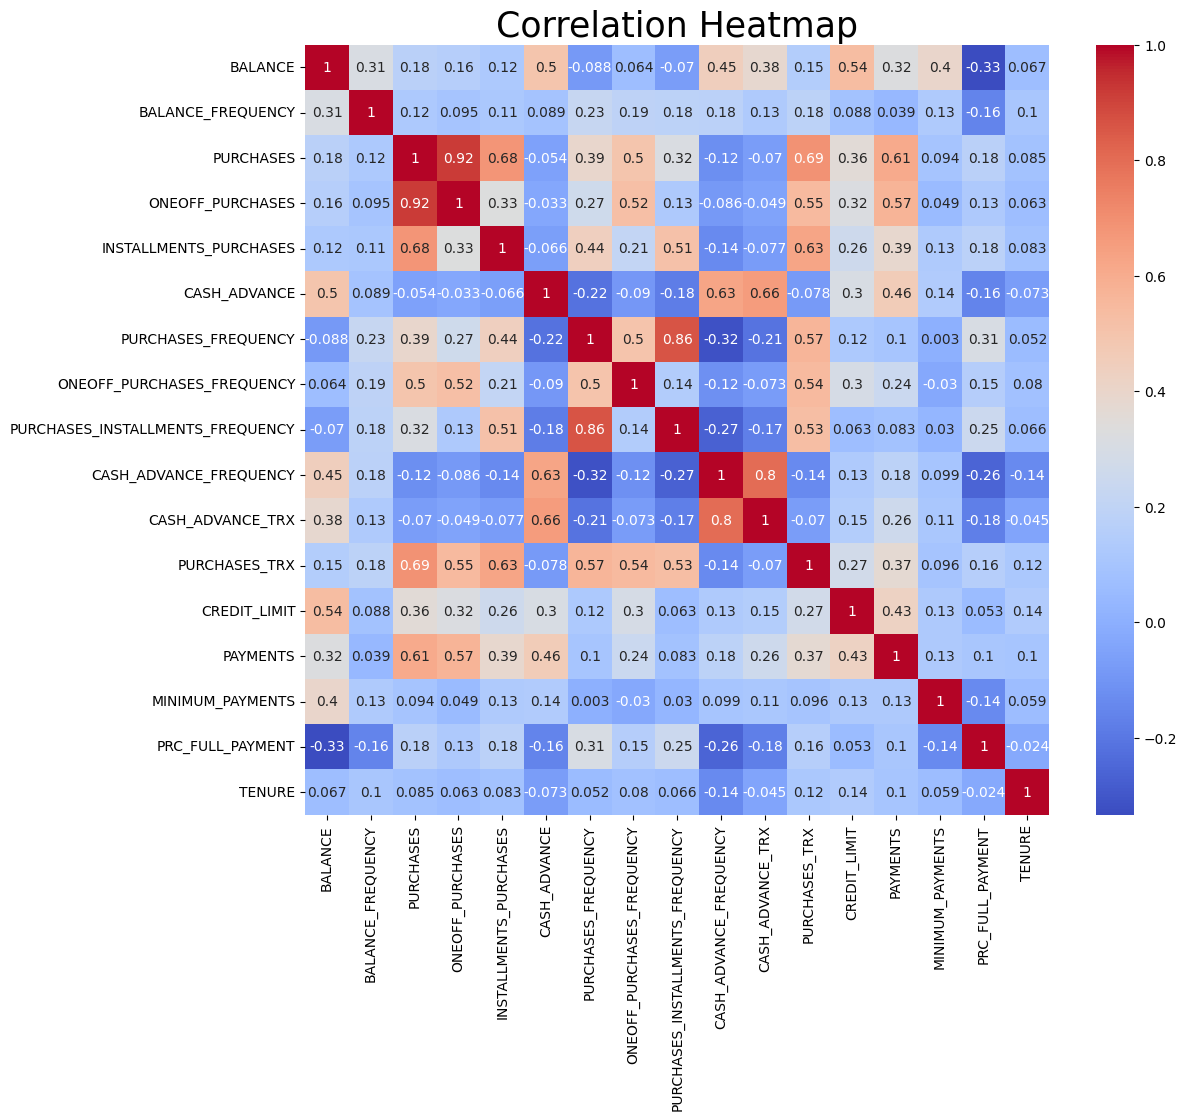

In [10]:
# Heatmap of correlations between the columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=25)
plt.show()

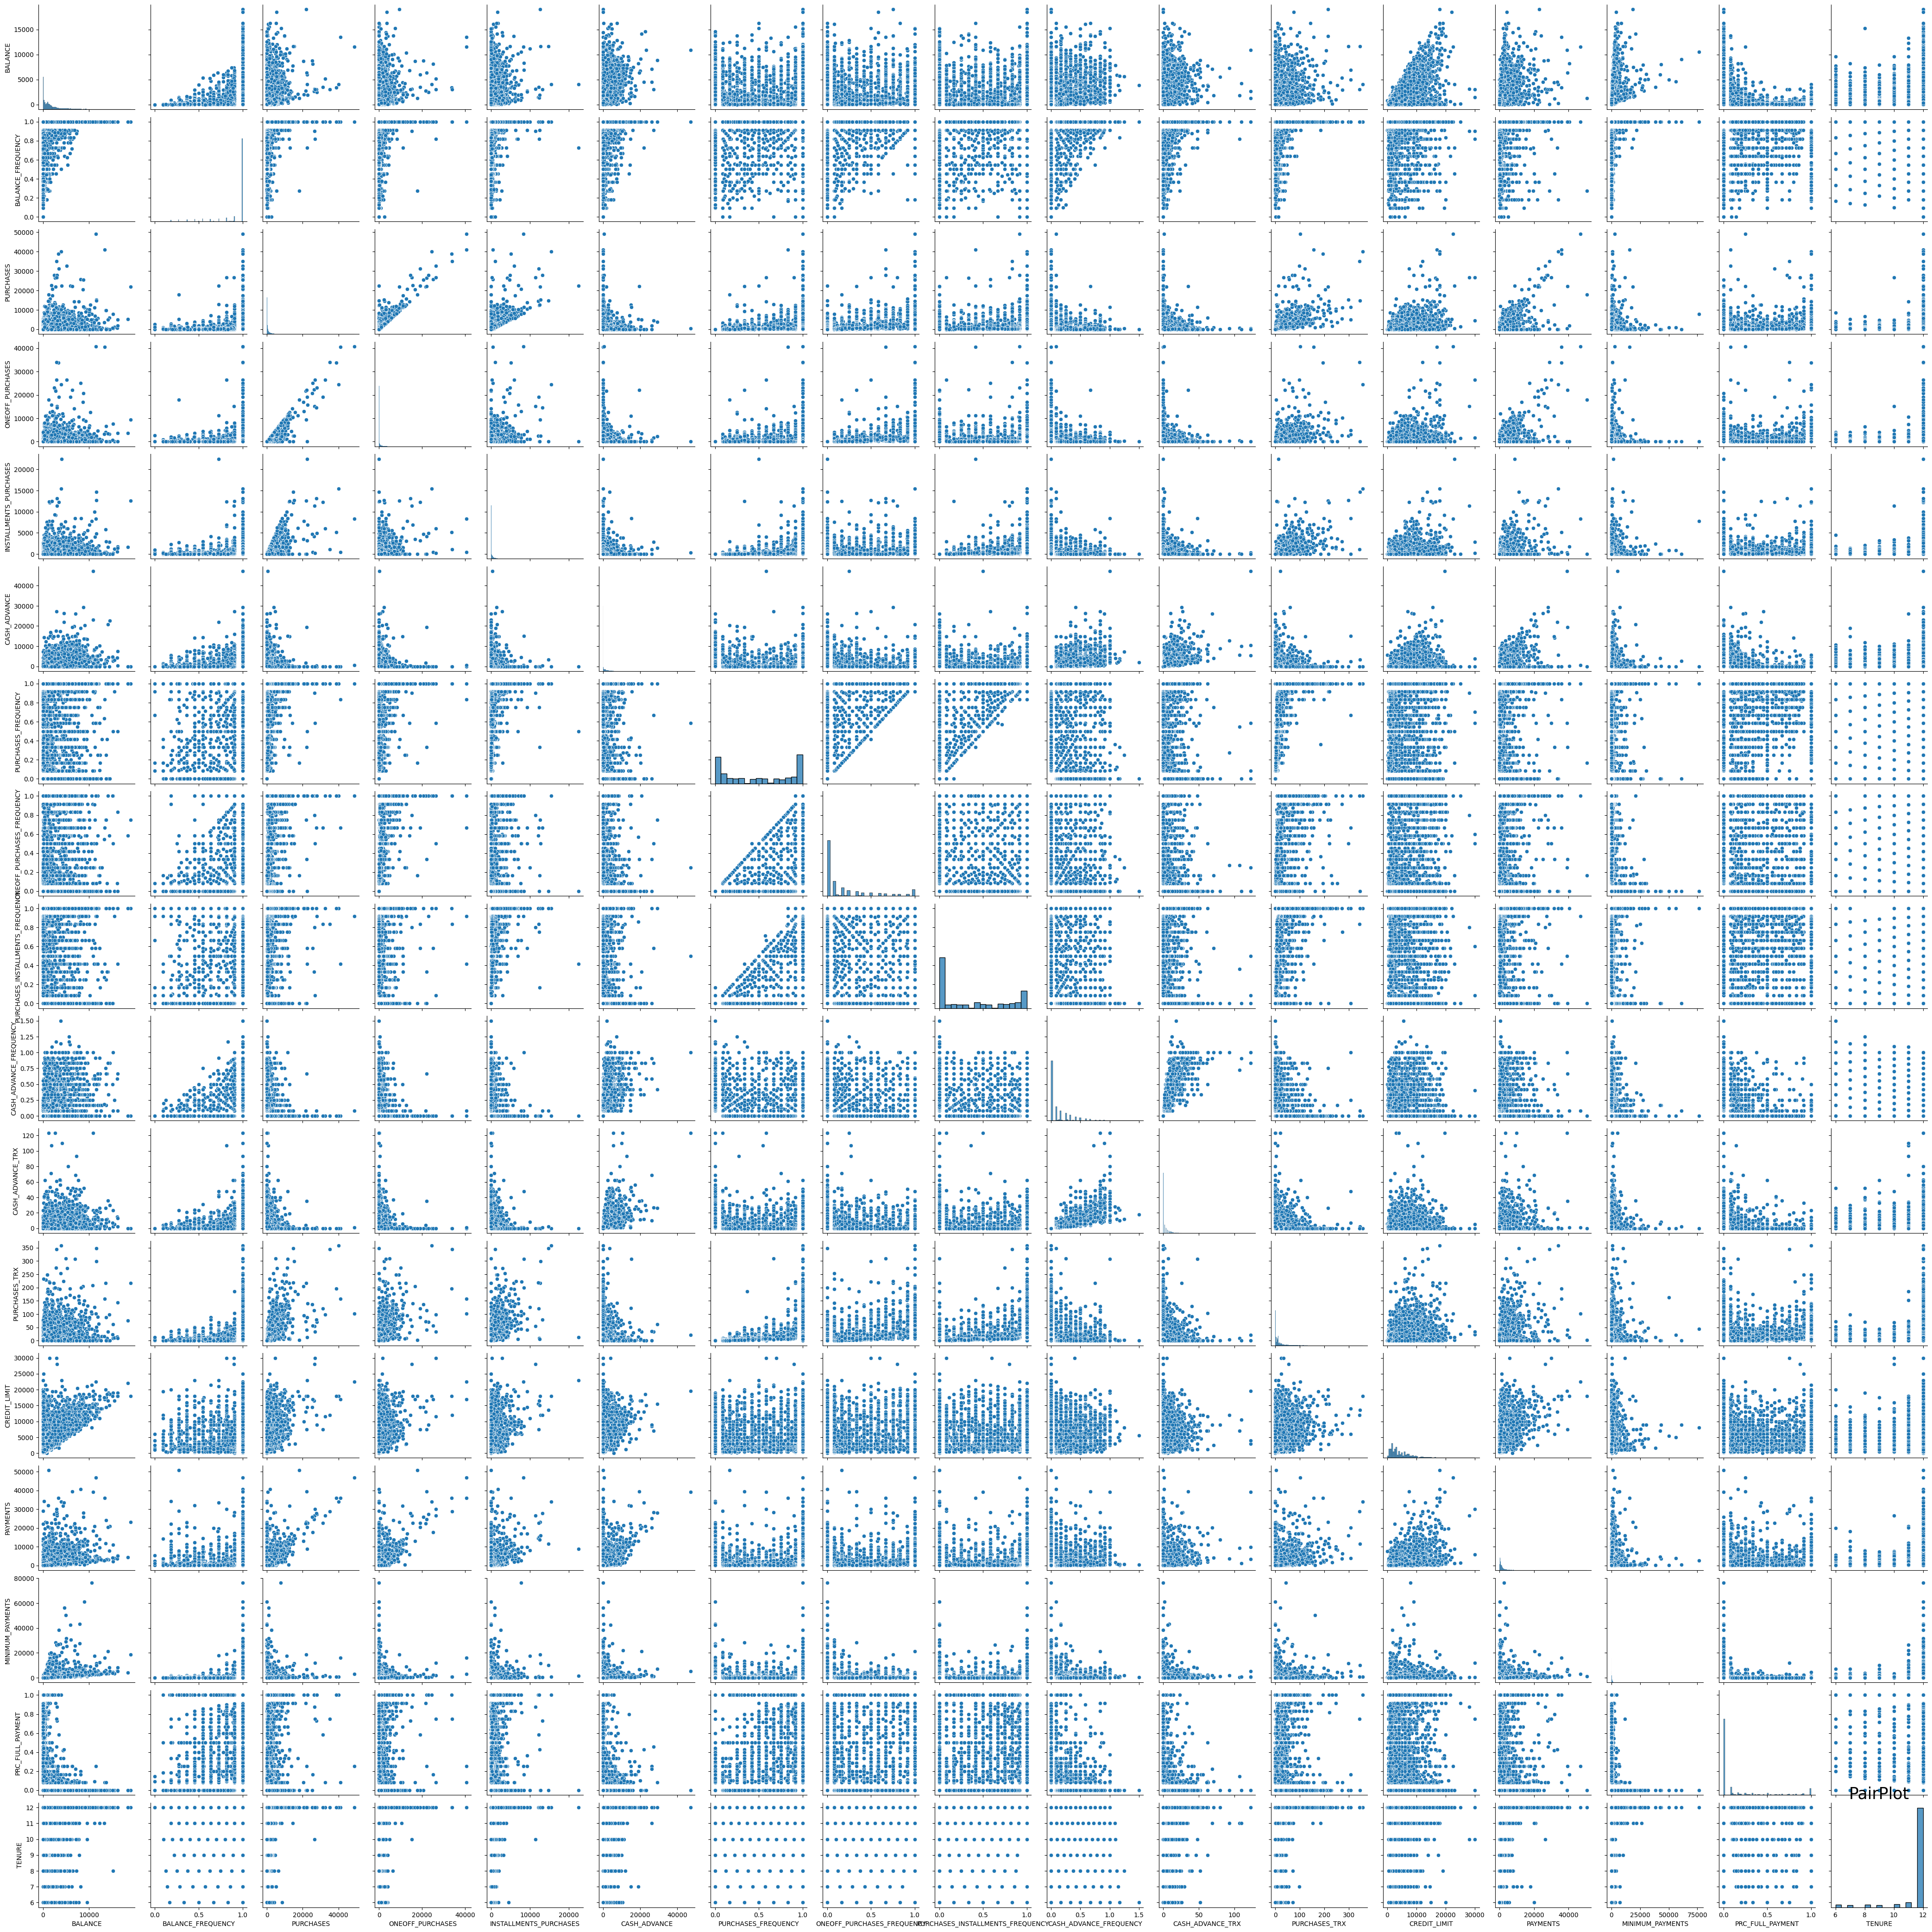

In [13]:
sns.pairplot(df)
plt.title("PairPlot", fontsize=25)
plt.show()

#### Observations:
Based on the heatmap we can infer that there are bunch of highly correlated pairs of columns such as 
* `PURCHASES` X `ONEOFF_PURCHASES`
* `PURCHASES_INSTALLMENTS_FREQUENCY` X `PURCHASES_FREQUENCY`
* `CASH_ADVANCE_FREQUENCY` X `CASH_ADVANCE_TRX`
* `PURCHASES` X `PURCHASE_TRX`
* `PURCHASES` X `INSTALLMENT_PURCHASES`
and more....

The Pairplot also clearly depicts these correlations. 


<h2 align=center>Modeling</h2>

---

In [53]:
# Creating MinMaxScaler() object
scaler = MinMaxScaler()

# Fit the scaler to the data. 
scaler.fit(df)

# Transform the data and store in new DataFrame
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.042940           1.000000   0.000326          0.000393   
4  0.095038           1.000000   0.027188          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004240      0.000000             0.166667   
1                0.000000      0.136685             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.000000             0.083333   
4                0.059257      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.000000           0.00000       0.002793      0.038397   
4                0.000000           0.00000       0.022346      0.058431   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003978          0.001826          0.000000     1.0  
1  0.080892          0.014034          0.222222     1.0  
2  0.012263          0.008210          0.000000     1.0  
3  0.013373          0.003204          0.000000     1.0  
4  0.027602          0.031506          0.000000     1.0

### Agglomerative Clustering

In [15]:
# Define the parameter grid
param_grid = {
    'n_clusters': [2,3,4,5,6],
    'metric': ['euclidean'],
    'linkage': ['ward', 'complete', 'average', 'single']
}

best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
silhouette_scores = []
score_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    model = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage']).fit(df_scaled)
    
    # Calculate silhouette score (or other metrics)
    score = silhouette_score(df_scaled, model.labels_)
    
    # Append the score and the corresponding parameters
    silhouette_scores.append((params, score))

       # Compare and store best model
    if score > best_score:
        best_score = score
        best_params = params

    # Storing the scores with params in a DataFrame
    params_temp = params.copy()
    params_temp['score'] = score
    score_df = pd.concat([score_df, pd.DataFrame(params_temp, index=[0])], ignore_index=True)

Best parameters: {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 2}
Best silhouette score: 0.4700520604891176


In [16]:
score_df.sort_values('score', ascending=False).reset_index(drop=True)

linkage     metric  n_clusters     score
0    average  euclidean           2  0.470052
1     single  euclidean           2  0.470052
2    average  euclidean           3  0.384426
3   complete  euclidean           2  0.376460
4     single  euclidean           3  0.376454
5   complete  euclidean           3  0.368642
6       ward  euclidean           2  0.366253
7       ward  euclidean           3  0.332388
8     single  euclidean           4  0.320580
9   complete  euclidean           4  0.319195
10  complete  euclidean           5  0.318899
11   average  euclidean           4  0.317368
12  complete  euclidean           6  0.298127
13    single  euclidean           5  0.274069
14    single  euclidean           6  0.272587
15      ward  euclidean           4  0.261571
16   average  euclidean           5  0.256945
17      ward  euclidean           6  0.256232
18      ward  euclidean           5  0.255962
19   average  euclidean           6  0.208568

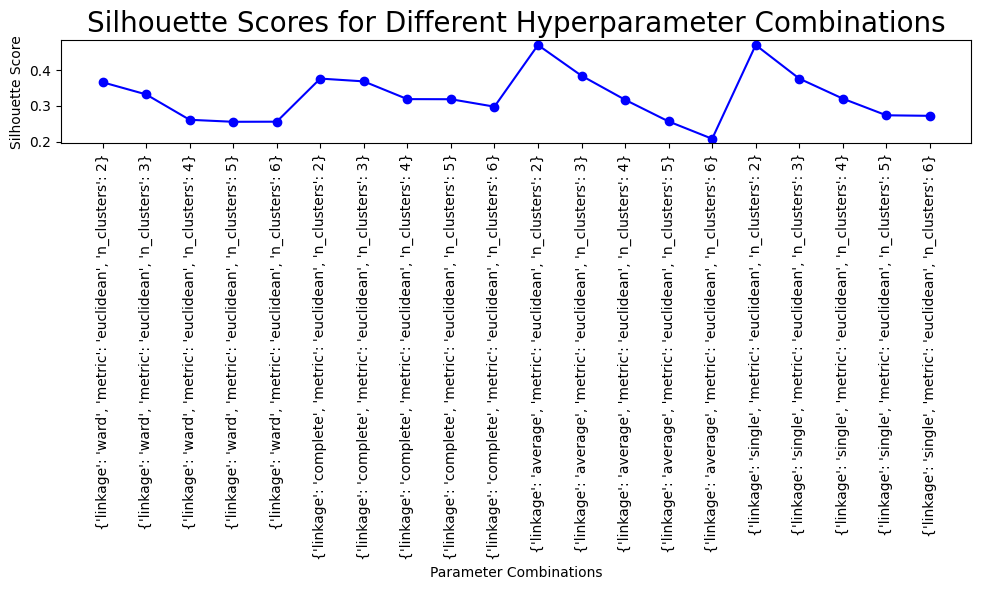

In [17]:
# Extract scores and params for plotting
scores = [score for _, score in silhouette_scores]
params = [str(param) for param, _ in silhouette_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='b')
plt.xticks(range(len(params)), params, rotation=90)  # Set the x-tick labels to the parameter combinations
plt.xlabel('Parameter Combinations')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Hyperparameter Combinations', size=20)
plt.tight_layout()
plt.show()

In [56]:
best_cluster = AgglomerativeClustering(n_clusters=3, linkage='single').fit(df_scaled).labels_

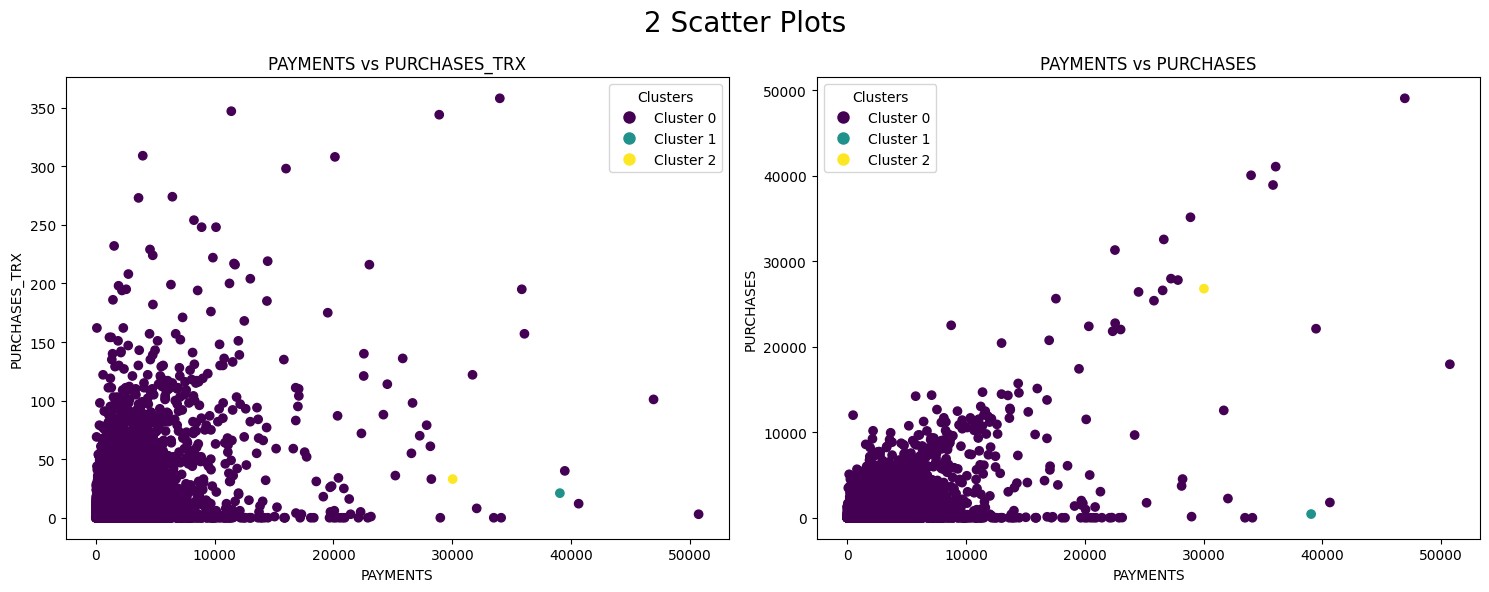

In [57]:
# Custom legend labels based on clusters
unique_clusters = np.unique(best_cluster)  # Extract unique cluster labels
scatter_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Generate colors from cmap

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES_TRX'
scatter1 = ax1.scatter(df[x_column], df[y_column], c=best_cluster, cmap='viridis')
ax1.set_title(f"{x_column} vs {y_column}")
ax1.set_xlabel(x_column)
ax1.set_ylabel(y_column)

# Second scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES'
scatter2 = ax2.scatter(df[x_column], df[y_column], c=best_cluster, cmap='viridis')
ax2.set_title(f"{x_column} vs {y_column}")
ax2.set_xlabel(x_column)
ax2.set_ylabel(y_column)

# Adding legends to both subplots
for ax in [ax1, ax2]:
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                          markersize=10, markerfacecolor=color) 
               for cluster, color in zip(unique_clusters, scatter_colors)]
    ax.legend(handles=handles, title="Clusters", loc='best')

# Global title for the figure
fig.suptitle("2 Scatter Plots", size=20)

plt.tight_layout()
plt.show()

In [58]:
pca = PCA(2)
pca_data =pca.fit_transform(df_scaled)
pca_data = pd.DataFrame(data = pca_data, columns=['pca1', 'pca2'])

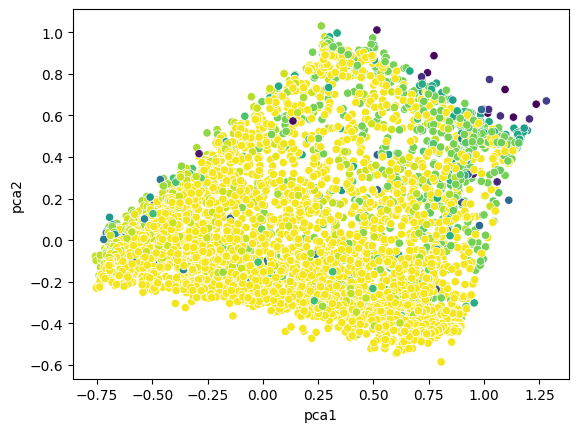

In [68]:
sns.scatterplot(x=pca_data['pca1'], y=pca_data['pca2'], c=best_cluster)
plt.show()

### Divisive Clustering

In [29]:
# Generate distance matrix with 'linkage' function
distances = linkage(df_scaled, method="complete")
print(distances)

[[4.21200000e+03 6.14700000e+03 9.27071433e-03 2.00000000e+00]
 [2.16500000e+03 7.78900000e+03 1.41017780e-02 2.00000000e+00]
 [3.79800000e+03 5.37000000e+03 1.50914115e-02 2.00000000e+00]
 ...
 [1.72560000e+04 1.72670000e+04 3.88043655e+01 8.61200000e+03]
 [2.05400000e+03 1.72680000e+04 4.44806189e+01 8.61300000e+03]
 [1.72660000e+04 1.72690000e+04 4.66019128e+01 8.63600000e+03]]


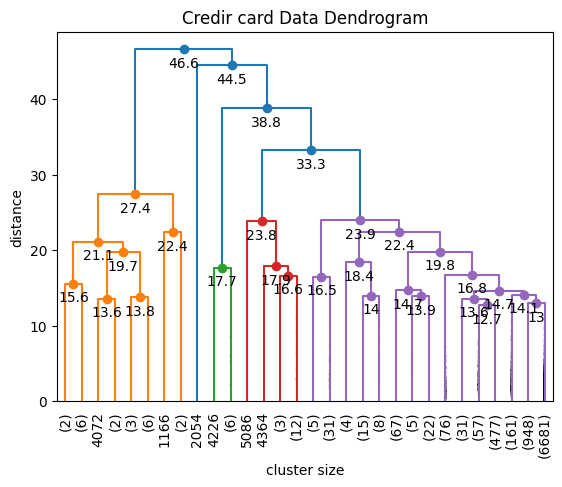

In [30]:
# Take normal dendrogram output and stylize in cleaner way

def annotated_dendrogram(*args, **kwargs):
    # Standard dendrogram from SciPy
    scipy_dendro = dendrogram(*args, truncate_mode='lastp', show_contracted=True,leaf_rotation=90.)

    plt.title('Credir card Data Dendrogram')
    plt.xlabel('cluster size')
    plt.ylabel('distance')
    
    for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'], scipy_dendro['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > 0:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    return scipy_dendro

dn = annotated_dendrogram(distances)
plt.show()

In [31]:
# Define the parameter grid
param_grid = {
    't' : [15, 20, 25, 30, 40],
    'criterion' : ['distance'],
    'depth' : [1,5,10]
}


best_score = -1
best_params = None

# Initialize a dictionary to store silhouette scores for each parameter combination
fc_sil_scores = []
fc_sil_scores_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    # Create the Agglomerative Clustering model
    scipy_clusters = fcluster(distances, t= params['t'], criterion= params['criterion'], depth= params['depth'])

    unique_labels = len(set(scipy_clusters))
    
    if unique_labels > 1:
        # Calculate silhouette score (or other metrics)
        score = silhouette_score(df_scaled,scipy_clusters)

        # Append the score and the corresponding parameters
        fc_sil_scores.append((params, score))

        # Storing the scores with params in a DataFrame
        params_temp = params.copy()
        params_temp['score'] = score
        fc_sil_scores_df = pd.concat([fc_sil_scores_df, pd.DataFrame(params_temp, index=[0])], ignore_index=True)
        
        # Compare and store best model
        if score > best_score:
            best_score = score
            best_params = params
    else:
        print(f"Skipping t={params['t']} due to a single cluster.")

In [32]:
fc_sil_scores_df.sort_values('score', ascending=False).reset_index(drop=True)

criterion  depth   t     score
0   distance      1  40  0.783461
1   distance      5  40  0.783461
2   distance     10  40  0.783461
3   distance      1  30  0.698631
4   distance      5  30  0.698631
5   distance     10  30  0.698631
6   distance      1  25  0.698416
7   distance      5  25  0.698416
8   distance     10  25  0.698416
9   distance      1  20  0.531613
10  distance      5  20  0.531613
11  distance     10  20  0.531613
12  distance      1  15  0.353199
13  distance      5  15  0.353199
14  distance     10  15  0.353199

In [66]:
best_cluster = fcluster(distances, t=10, depth=1, criterion='distance')

/Users/gagandeepsingh/anaconda3/envs/UML/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


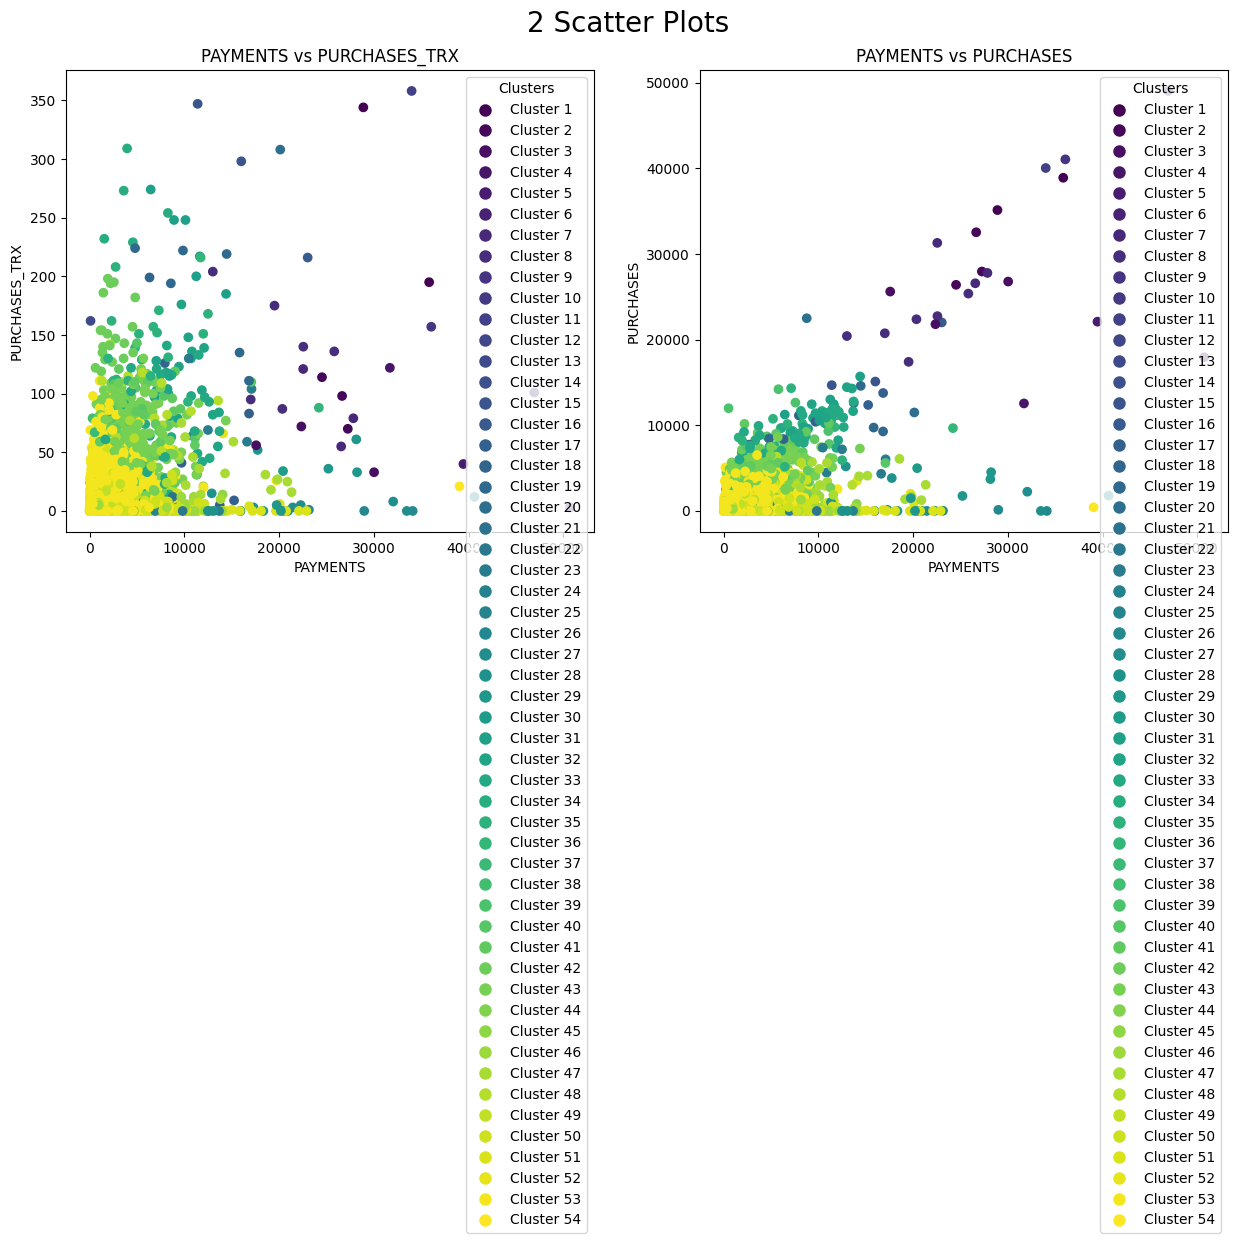

In [67]:
# Custom legend labels based on clusters
unique_clusters = np.unique(best_cluster)  # Extract unique cluster labels
scatter_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Generate colors from cmap

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# First scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES_TRX'
scatter1 = ax1.scatter(df[x_column], df[y_column], c=best_cluster, cmap='viridis')
ax1.set_title(f"{x_column} vs {y_column}")
ax1.set_xlabel(x_column)
ax1.set_ylabel(y_column)

# Second scatter plot
x_column = 'PAYMENTS'
y_column = 'PURCHASES'
scatter2 = ax2.scatter(df[x_column], df[y_column], c=best_cluster, cmap='viridis')
ax2.set_title(f"{x_column} vs {y_column}")
ax2.set_xlabel(x_column)
ax2.set_ylabel(y_column)

# Adding legends to both subplots
for ax in [ax1, ax2]:
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                          markersize=10, markerfacecolor=color) 
               for cluster, color in zip(unique_clusters, scatter_colors)]
    ax.legend(handles=handles, title="Clusters", loc='best')

# Global title for the figure
fig.suptitle("2 Scatter Plots", size=20)

plt.tight_layout()
plt.show()